In [ ]:
import pandas as pd
data = pd.read_csv('btc_his.csv')
data['Date'] = pd.to_datetime(data['Date'])
data = data.sort_values(by='Date').reset_index(drop=True)
data['Price'] = data['Price'].str.replace(',', '').astype(float)
data.head()

,Date,Price,Open,High,Low,Vol.,Change %
0,2010-07-18,0.1,0.0,0.1,0.1,0.08K,0.00%
1,2010-07-19,0.1,0.1,0.1,0.1,0.57K,0.00%
2,2010-07-20,0.1,0.1,0.1,0.1,0.26K,0.00%
3,2010-07-21,0.1,0.1,0.1,0.1,0.58K,0.00%
4,2010-07-22,0.1,0.1,0.1,0.1,2.16K,0.00%


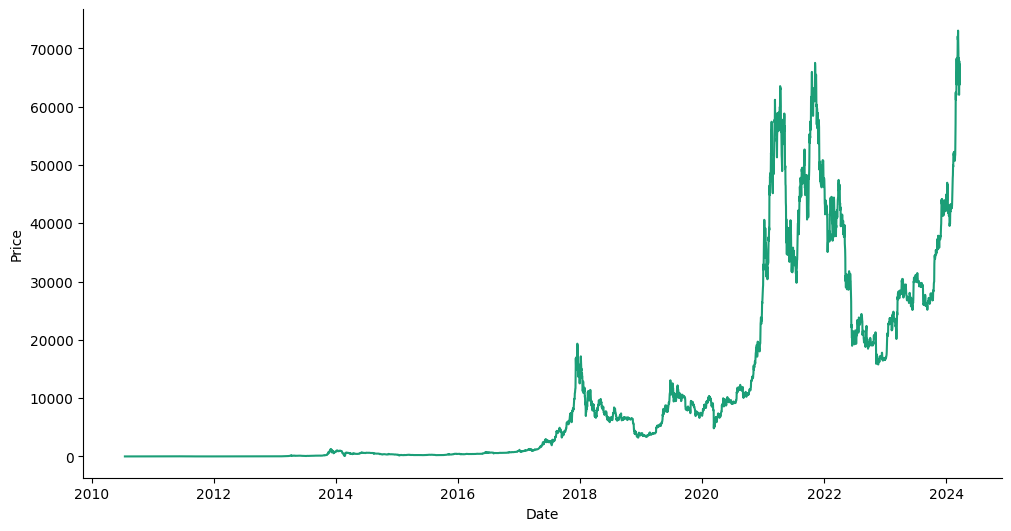

In [ ]:
# @title Date vs Price

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Date']
  ys = series['Price']

  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = data.sort_values('Date', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Date')
_ = plt.ylabel('Price')

In [ ]:
def calculate_ewma(prices, lambdas, nf):
    ewma_results = []
    for i in range(len(prices)):
        ewma_results.append((1 - lambdas) * pow(lambdas, i) * float(prices.iloc[i]) * nf)
    return sum(ewma_results)

In [ ]:
def sign(x):
    return 1 if x >= 0 else -1

def calculate_trend_indicator(data, lambdas, nfs):
    MA1 = calculate_ewma(data, lambdas[0], nfs[0])  # 1 day
    MA2_5 = calculate_ewma(data, lambdas[1], nfs[1])  # 2.5 days
    MA5 = calculate_ewma(data, lambdas[2], nfs[2])  # 5 days
    MA10 = calculate_ewma(data, lambdas[3], nfs[3])  # 10 days
    MA20 = calculate_ewma(data, lambdas[4], nfs[4])  # 20 days
    MA40 = calculate_ewma(data, lambdas[5], nfs[5])  # 40 days
    MAP1 = sign(MA1 - MA5)
    MAP2 = sign(MA2_5 - MA10)
    MAP3 = sign(MA5 - MA20)
    MAP4 = sign(MA10 - MA40)

    # Debug: print intermediate values
    print(f'MA1: {MA1}, MA2_5: {MA2_5}, MA5: {MA5}, MA10: {MA10}, MA20: {MA20}, MA40: {MA40}')
    print(f'MAP1: {MAP1}, MAP2: {MAP2}, MAP3: {MAP3}, MAP4: {MAP4}')

    result = MAP1 + MAP2 + MAP3 + MAP4
    return result / 4


In [ ]:
current_data = data['Price'][:180]
print(current_data)

0      0.1
1      0.1
2      0.1
3      0.1
4      0.1
      ... 
175    0.3
176    0.3
177    0.3
178    0.3
179    0.3
Name: Price, Length: 180, dtype: float64


In [ ]:
# Define your lambda and nf values
lambdas = [0.5, 0.757858283, 0.870550563, 0.933032992, 0.965936329, 0.982820599]
nfs = [1.0000, 1.0000, 1.0000, 1.0000, 1.0020, 1.0462]

trend_indicators = []

for i in range(180, len(data)):
    current_data = data['Price'][:i]
    current_data = current_data[::-1]
    trend_indicator = calculate_trend_indicator(current_data, lambdas, nfs)
    trend_indicators.append(trend_indicator)

# Create a new DataFrame for the results
results = data[['Date', 'Price']][180:].copy()
results['Trend Indicator'] = trend_indicators

# Save the results to a new CSV file
results.to_csv('trend_indicators.csv', index=False)

Streaming output truncated to the last 5000 lines.
MA1: 1966.5176316836166, MA2_5: 1871.4655969247574, MA5: 1768.3521007217723, MA10: 1618.7565120674833, MA20: 1449.5520460049572, MA40: 1326.0918463794267
MAP1: 1, MAP2: 1, MAP3: 1, MAP4: 1
MA1: 2005.3588158418077, MA2_5: 1913.291801870367, MA5: 1804.060455980973, MA10: 1647.2471895274105, MA20: 1469.9472041831852, MA40: 1340.0509719882623
MAP1: 1, MAP2: 1, MAP3: 1, MAP4: 1
MA1: 2064.8794079209056, MA2_5: 1964.409903438253, MA5: 1845.528229603072, MA10: 1679.2006856035478, MA20: 1492.3849986302637, MA40: 1355.211729944619
MAP1: 1, MAP2: 1, MAP3: 1, MAP4: 1
MA1: 2168.739703960452, MA2_5: 2039.0355825821089, MA5: 1900.8124298395476, MA10: 1718.9388622379295, MA20: 1519.1168119436152, MA40: 1372.7756469987137
MAP1: 1, MAP2: 1, MAP3: 1, MAP4: 1
MA1: 2307.0198519802248, MA2_5: 2137.4091461716807, MA5: 1971.2960392503167, MA10: 1767.5810943613335, MA20: 1550.8326031366944, MA40: 1393.1417790052444
MAP1: 1, MAP2: 1, MAP3: 1, MAP4: 1
MA1: 2307.

#Backtest

Buy BTC: 15.88 units
No data available for index 1449. Skipping.
No data available for index 1450. Skipping.
No data available for index 1451. Skipping.
No data available for index 1452. Skipping.
No data available for index 1453. Skipping.
No data available for index 1454. Skipping.
No data available for index 1455. Skipping.
No data available for index 1456. Skipping.
No data available for index 1457. Skipping.
No data available for index 1458. Skipping.
No data available for index 1459. Skipping.
No data available for index 1460. Skipping.
No data available for index 1461. Skipping.
No data available for index 1462. Skipping.
No data available for index 1463. Skipping.
No data available for index 1464. Skipping.
No data available for index 1465. Skipping.
No data available for index 1466. Skipping.
No data available for index 1467. Skipping.
No data available for index 1468. Skipping.
No data available for index 1469. Skipping.
No data available for index 1470. Skipping.
No data ava

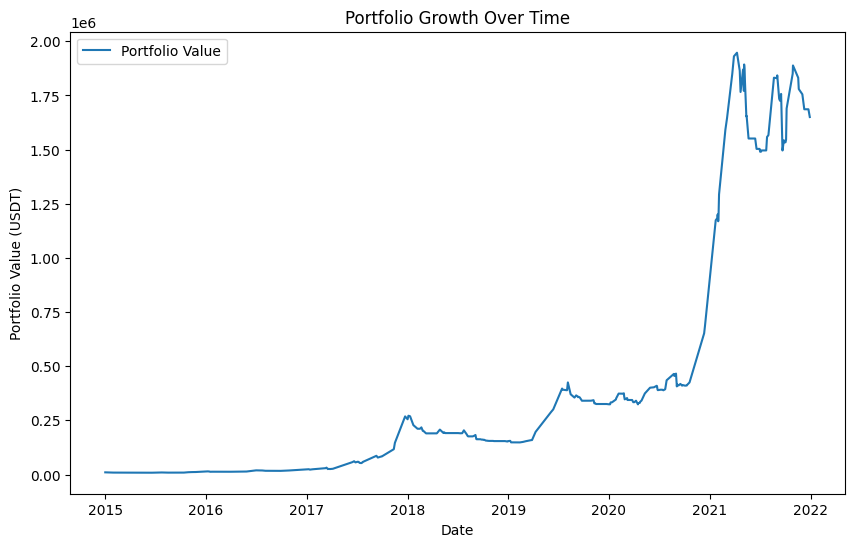

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
import time

# Load the dataset
data = pd.read_csv('trend_indicators.csv')
data['Date'] = pd.to_datetime(data['Date'])

# Function to get value by index
def getValue(index):
    if index >= len(data):
        return None
    row = data.iloc[index]
    return [row['Date'], row['Date'].timestamp(), row['Price'], row['Trend Indicator']]

# Function to get balance asset
def getBalanceAsset(index, balance_df):
    if index < 0 or index >= len(balance_df):
        return None
    return balance_df.iloc[index]

# Rebalance portfolio function
def rebalancePortfolio(index, target_btc_ratio, timestamp, usdtBalance, btcBalance, balance_df):
    value = getValue(index)
    if value is None or len(value) < 4:
        print(f"No data available for index {index}. Skipping.")
        return usdtBalance, btcBalance, balance_df

    currentBTCPrice = value[2]
    total_value = usdtBalance + (btcBalance * currentBTCPrice)
    target_btc_value = total_value * target_btc_ratio
    target_usdt_value = total_value * (1 - target_btc_ratio)

    if target_btc_value > (btcBalance * currentBTCPrice):
        print(f"Buy BTC: {(target_btc_value - (btcBalance * currentBTCPrice)) / currentBTCPrice:.2f} units")
    elif target_btc_value < (btcBalance * currentBTCPrice):
        print(f"Sell BTC: {((btcBalance * currentBTCPrice) - target_btc_value) / currentBTCPrice:.2f} units")

    btcBalance = target_btc_value / currentBTCPrice
    usdtBalance = target_usdt_value
    btcValue = btcBalance * currentBTCPrice
    finalValue = usdtBalance + btcValue

    # Append to balance_df using concat
    new_entry = pd.DataFrame({
        'timestamp': [timestamp],
        'usdtBalance': [usdtBalance],
        'bitcoinBalance': [btcBalance],
        'bitcoinValue': [btcValue],
        'assetValue': [finalValue]
    })
    balance_df = pd.concat([balance_df, new_entry], ignore_index=True)

    return usdtBalance, btcBalance, balance_df

# Update Bitcoin value function
def updateBitcoinValue(index, balance_df):
    value = getValue(index)
    if value is None or len(value) < 4:
        print(f"No data available for index {index}. Skipping.")
        return balance_df

    balance = getBalanceAsset(index-1, balance_df)
    if balance is None or len(balance) < 5:
        print(f"No data available for index {index}. Skipping.")
        return balance_df

    currentBTCPrice = value[2]
    currentTimestamp = value[1]
    lastUSDTAmount = float(balance['usdtBalance'])
    lastBTCAmount = float(balance['bitcoinBalance'])
    currentBTCValue = lastBTCAmount * currentBTCPrice
    totalAmount = currentBTCValue + lastUSDTAmount

    # Append to balance_df using concat
    new_entry = pd.DataFrame({
        'timestamp': [currentTimestamp],
        'usdtBalance': [lastUSDTAmount],
        'bitcoinBalance': [lastBTCAmount],
        'bitcoinValue': [currentBTCValue],
        'assetValue': [totalAmount]
    })
    balance_df = pd.concat([balance_df, new_entry], ignore_index=True)

    return balance_df

# Main strategy function
def strategy1(start_date, end_date, initial_balance):
    # Filter data by date range
    filtered_data = data[(data['Date'] >= start_date) & (data['Date'] <= end_date)]
    balance_df = pd.DataFrame(columns=['timestamp', 'usdtBalance', 'bitcoinBalance', 'bitcoinValue', 'assetValue'])

    usdtBalance = initial_balance
    bitcoinBalance = 0.0

    # Initialize balance based on starting condition
    initial_value = getValue(filtered_data.index[0])
    timestamp = initial_value[1]
    usdtBalance, bitcoinBalance, balance_df = rebalancePortfolio(filtered_data.index[0], 0.5, timestamp, usdtBalance, bitcoinBalance, balance_df)

    for i in range(1, len(filtered_data)):
        valueNow = getValue(filtered_data.index[i])
        valueThen = getValue(filtered_data.index[i-1])
        currentTrend = valueNow[3]
        lastTrend = valueThen[3]
        if currentTrend == lastTrend:
            balance_df = updateBitcoinValue(filtered_data.index[i], balance_df)
        else:
            balanceLast = getBalanceAsset(len(balance_df) - 1, balance_df)
            usdtBalance = float(balanceLast['usdtBalance'])
            bitcoinBalance = float(balanceLast['bitcoinBalance'])
            currTimestamp = valueNow[1]
            if currentTrend == 0:
                usdtBalance, bitcoinBalance, balance_df = rebalancePortfolio(filtered_data.index[i], 0.5, currTimestamp, usdtBalance, bitcoinBalance, balance_df)
            elif currentTrend == 0.5:
                usdtBalance, bitcoinBalance, balance_df = rebalancePortfolio(filtered_data.index[i], 0.75, currTimestamp, usdtBalance, bitcoinBalance, balance_df)
            elif currentTrend == -0.5:
                usdtBalance, bitcoinBalance, balance_df = rebalancePortfolio(filtered_data.index[i], 0.25, currTimestamp, usdtBalance, bitcoinBalance, balance_df)
            elif currentTrend == 1:
                usdtBalance, bitcoinBalance, balance_df = rebalancePortfolio(filtered_data.index[i], 1, currTimestamp, usdtBalance, bitcoinBalance, balance_df)
            elif currentTrend == -1:
                usdtBalance, bitcoinBalance, balance_df = rebalancePortfolio(filtered_data.index[i], 0, currTimestamp, usdtBalance, bitcoinBalance, balance_df)
        time.sleep(0.1)

    # Save the results to a new CSV file
    balance_df.to_csv('backtest_results.csv', index=False)

    # Plotting the portfolio growth
    plt.figure(figsize=(10, 6))
    plt.plot(pd.to_datetime(balance_df['timestamp'], unit='s'), balance_df['assetValue'], label='Portfolio Value')
    plt.xlabel('Date')
    plt.ylabel('Portfolio Value (USDT)')
    plt.title('Portfolio Growth Over Time')
    plt.legend()
    plt.show()

# Customize parameters
start_date = '2015-01-01'
end_date = '2021-12-31'
initial_balance = 10000.0

# Run the strategy
strategy1(start_date, end_date, initial_balance)


NameError: name 'balance_df' is not defined

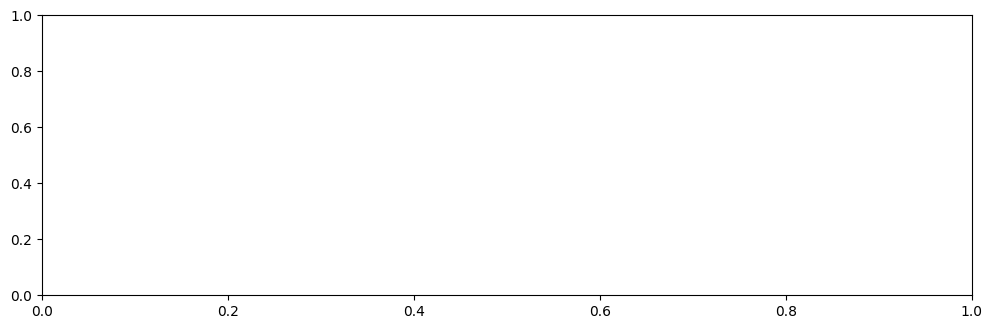

In [15]:
    # Plotting the portfolio growth and drawdown
    plt.figure(figsize=(12, 8))

    plt.subplot(2, 1, 1)
    plt.plot(pd.to_datetime(balance_df['timestamp'], unit='s'), balance_df['assetValue'], label='Portfolio Value')
    plt.xlabel('Date')
    plt.ylabel('Portfolio Value (USDT)')
    plt.title('Portfolio Growth Over Time')
    plt.legend()

    plt.subplot(2, 1, 2)
    plt.plot(pd.to_datetime(balance_df['timestamp'], unit='s'), balance_df['drawdown'], label='Drawdown', color='red')
    plt.xlabel('Date')
    plt.ylabel('Drawdown')
    plt.title('Drawdown Over Time')
    plt.legend()

    plt.tight_layout()
    plt.show()